In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


# Task 1: Load and Explore the Dataset 
# In this task, we load the Iris dataset, display the first few rows, and inspect its structure.  
# We check data types, identify any missing values, and handle them appropriately.


try:
    # Load Iris dataset from sklearn
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    
    print("First 5 rows of dataset:")
    print(df.head())

    print("\nDataset Info:")
    print(df.info())

    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # No missing values in Iris, but example cleaning step
    df = df.dropna()

except FileNotFoundError:
    print("Dataset not found. Please check the file path.")

First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species   

In [ ]:

# Task 2: Basic Data Analysis
# Here we perform basic statistical analysis on numerical columns using `.describe()`.  
# We also group the data by the 'species' column and compute the mean of each numerical feature for each species.  
# This helps us understand patterns and differences between species.

print("\nBasic Statistics:")
print(df.describe())

# Group by species and compute mean
species_means = df.groupby('species').mean()
print("\nMean values by species:")
print(species_means)

# Findings
print("\nObservations:")
print("- Setosa species tends to have smaller petal length and width.")
print("- Virginica species has the largest petals on average.")
print("- Versicolor lies in between the other two.")


Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Mean values by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                           

C:\Users\user\AppData\Local\Temp\ipykernel_12076\2334662556.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = df.groupby('species').mean()


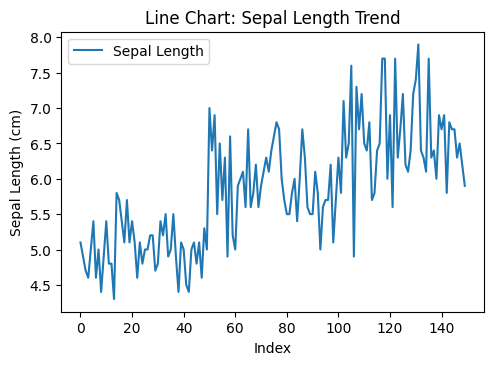

In [ ]:
# Task 3: Data Visualization
# Task 3: Data Visualization
#We create four different types of plots to visualize the dataset:

 # 1. Line Chart: Shows the trend of sepal length across the dataset indices.
# 2. Bar Chart: Compares the average petal length for each species.
# 3. Histogram: Displays the distribution of sepal width.
# 4. Scatter Plot: Visualizes the relationship between sepal length and petal length for each species.

# Plots are customized with titles, axis labels, and legends for clarity.


plt.figure(figsize=(12,8))

# 1. Line Chart (using sepal length as an example trend)
plt.subplot(2,2,1)
plt.plot(df.index, df['sepal length (cm)'], label='Sepal Length')
plt.title('Line Chart: Sepal Length Trend')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()

Text(0, 0.5, 'Petal Length (cm)')

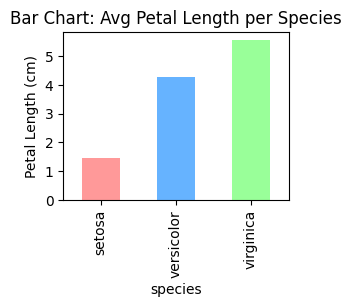

In [4]:
# 2. Bar Chart (average petal length per species)
plt.subplot(2,2,2)
species_means['petal length (cm)'].plot(kind='bar', color=['#FF9999','#66B3FF','#99FF99'])
plt.title('Bar Chart: Avg Petal Length per Species')
plt.ylabel('Petal Length (cm)')

Text(0, 0.5, 'Frequency')

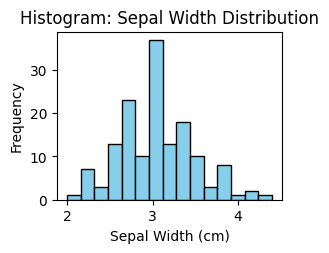

In [5]:
# 3. Histogram (distribution of sepal width)
plt.subplot(2,2,3)
plt.hist(df['sepal width (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram: Sepal Width Distribution')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

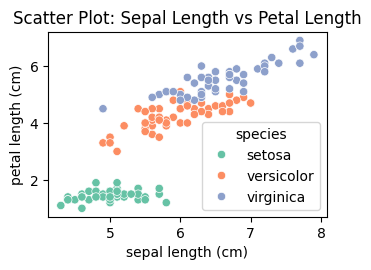

In [6]:
# 4. Scatter Plot (sepal length vs petal length)
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='Set2')
plt.title('Scatter Plot: Sepal Length vs Petal Length')

plt.tight_layout()
plt.show()